## Azure의 Cognitive Servie 의 Face 기능 사용하기

https://azure.microsoft.com/ko-kr/services/cognitive-services/face/#customer-stories

In [2]:
# function --> class --> module --> package
import requests # web server에 요청(request)하는 module

In [5]:
# 웹 사이트 호출
response = requests.get("http://naver.com") # html 코드를 반환

# <Response [200]>: 200은 통신이 잘 되었다는 의미
# <Response [404]>: 해당되는 주소에 뭐가 없다는 의미(이미지, 링크 깨짐 등), 통신이 잘 안 된것
# <Response [505]>: 해당되는 web server에 문제가 있다. 서버 상의 코딩 에러가 있는 경우가 많음

In [12]:
html = response.text
#print(html)

### 실습 진행
- Azure 서비스 정보
    - 키: 
    - 엔드포인트: https://daegu0001.cognitiveservices.azure.com/

In [15]:
import matplotlib.pyplot as plt # 데이터 시각화
from PIL import Image # 이미지 처리
from io import BytesIO # 이미지를 바이트코드로 처리
import json #

In [40]:
subscription_key = ''
vision_base_url = 'https://daegu0001.cognitiveservices.azure.com/vision/v2.0/'
analyze_url = vision_base_url + 'analyze'

In [41]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/" + \
"Broadway_and_Times_Square_by_night.jpg/450px-Broadway_and_Times_Square_by_night.jpg"

In [42]:
image = Image.open(BytesIO(requests.get(image_url).content))

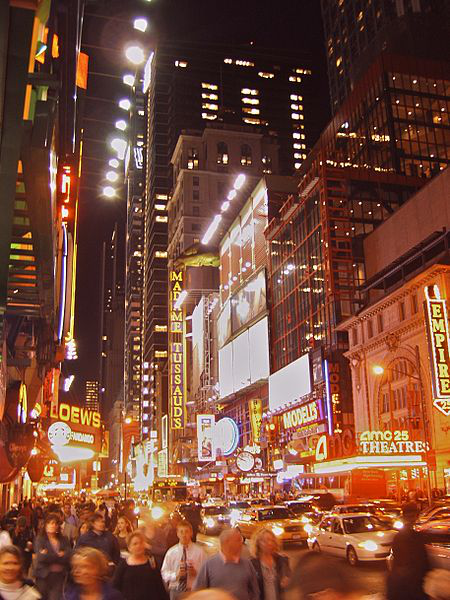

In [43]:
image

### 헤더 정보 셋팅

In [50]:
headers = {'Ocp-Apim-Subscription-Key':subscription_key}
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url': image_url}

In [51]:
response = requests.post(analyze_url, headers=headers, params=params, json=data)
# post 요청은 로그인창 (아이디, 비번 입력) -> 전달 -> 이때는 주소로 전달하는게 아니라 뒤로 보이지 않게 전달, 데이터 한계 없음, 보안 지켜짐
# get 방식: 주소창으로 전달, 보낼 수 있는 데이터에 한계가 있고, 주소창에 보여서 보안문제가 있음
# json: data 교환 방식, javascript object notation

### 분석 수행

In [55]:
analysis = response.json()
analysis

{'categories': [{'name': 'outdoor_',
   'score': 0.00390625,
   'detail': {'landmarks': []}},
  {'name': 'outdoor_street',
   'score': 0.33984375,
   'detail': {'landmarks': []}}],
 'color': {'dominantColorForeground': 'Brown',
  'dominantColorBackground': 'Brown',
  'dominantColors': ['Brown'],
  'accentColor': 'B54316',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['building',
   'outdoor',
   'street',
   'city',
   'people',
   'large',
   'busy',
   'many',
   'table',
   'filled',
   'group',
   'night',
   'walking',
   'traffic',
   'bunch',
   'standing',
   'light',
   'crowded',
   'man',
   'ride',
   'crowd',
   'sign',
   'tall',
   'riding',
   'umbrella',
   'bus'],
  'captions': [{'text': 'a group of people on a city street at night',
    'confidence': 0.8928721606523157}]},
 'requestId': '53d4b09a-9ad8-4873-8140-c25c6e15ddb3',
 'metadata': {'height': 600, 'width': 450, 'format': 'Jpeg'}}

In [76]:
# json 원소에 접근하기
image_caption = analysis['description']['captions'][0]['text']
image_caption

'a group of people on a city street at night'

# Object Detection

In [77]:
objectDetection_url = vision_base_url + 'detect'

In [78]:
#샘플 이미지는 뉴욕타임즈 이미지 입니다.
image_url='https://static01.nyt.com/images/2019/10/03/nyregion/03nytoday1/merlin_162008868_5a82355f-1be5-4ddb-b562-a6cd7b776a43-superJumbo.jpg?quality=90&auto=webp'

In [79]:
image = Image.open(BytesIO(requests.get(image_url).content))

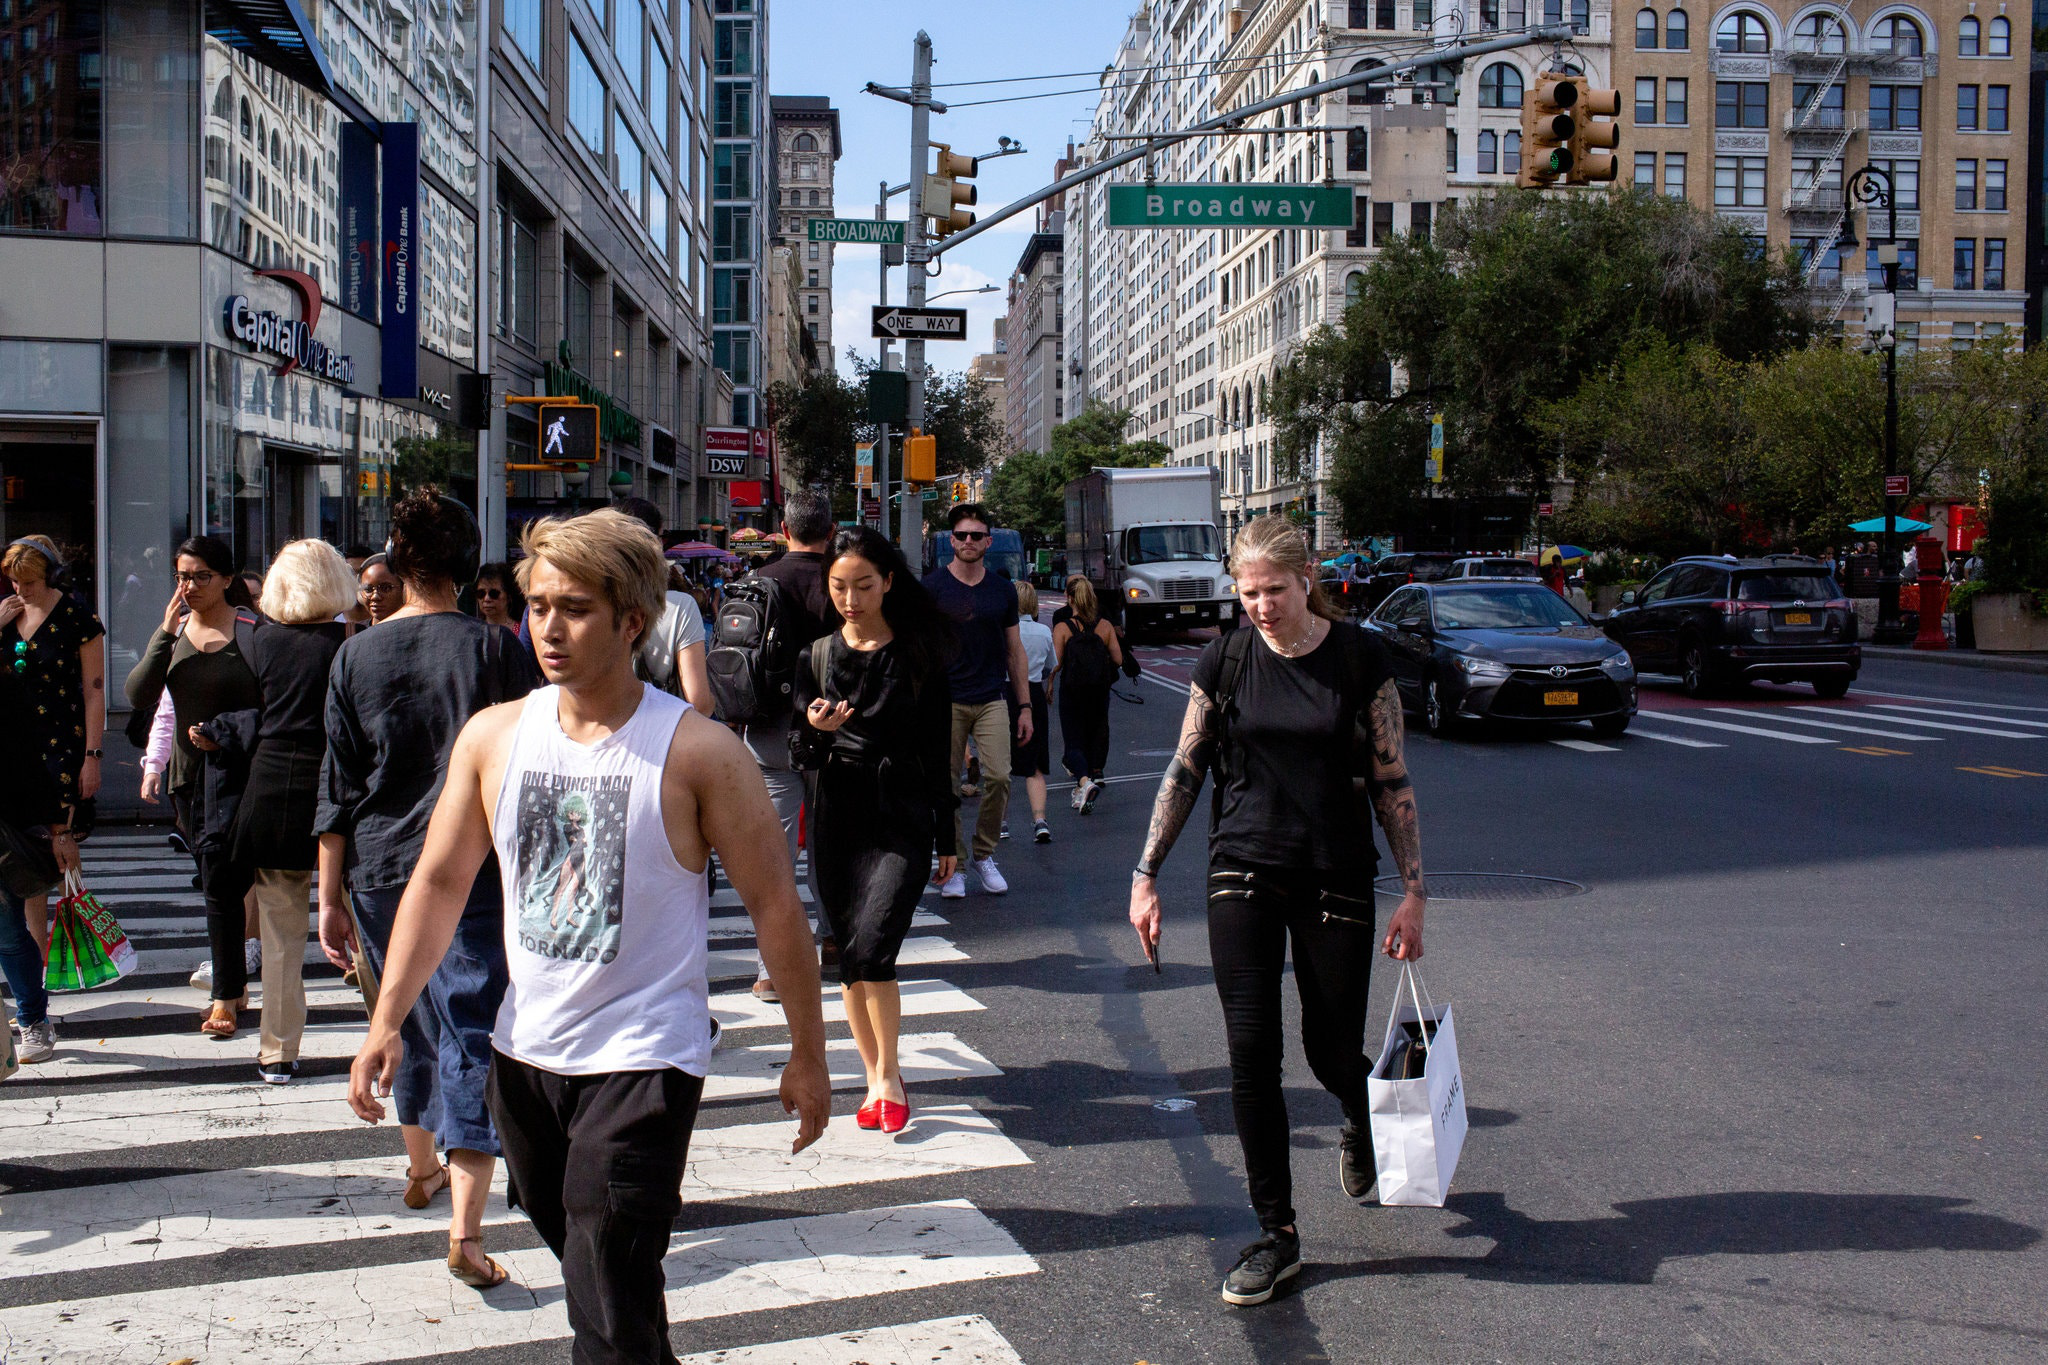

In [80]:
image